# Predictive elicitation

The examples below can be executed from within this page thanks to embedded integration with Binder via Thebe.
Click on the button below and start playing with PreliZ right from your browser or open this notebook or Binder directly [![badge](https://img.shields.io/badge/launch-binder-579ACA.svg?logo=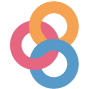)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Fpreliz%26urlpath%3Dtree%252Fpreliz%252Fdocs%252Fexamples%252Fobserved_space_examples.ipynb%26branch%3Dmain)


:::{thebe-button}
:::

In [1]:
# latest PreliZ might not be installed
import sys

!{sys.executable} -m pip install preliz@git+https://github.com/arviz-devs/preliz.git

In [1]:
import arviz as az
import preliz as pz
import numpy as np

In [2]:
az.style.use("arviz-white")

Predictive elicitation refers to the elicitation of priors by making evaluations on the observed space, instead of a the parameters space. The advantage of the former is that generally it is easier to thing about observation than parameters, specially for domain experts. If you are a Forest engineer, you may be more familiar with the expected rate of wildfires in an area than with the `rho` parameter of a model.

Currently PreliZ provides two functions for predictive elicitation. Most of the future development of PreliZ will be focused on improving these tool and providing other tools for predictive elicitation.

(predictive_sliders)=

## Predictive sliders

This functions will automatically generate sliders for a function with makes easier to explore how the prior predictive distribution changes when we change the priors.

So suppose you already have a model, but you are unsure about the implications of its parameters. You can write it using PreliZ distributions and put it inside a function with the arguments being the parameters you want to explore.

In [3]:
x = np.linspace(0, 1, 100)

def a_preliz_model(a_mu, a_sigma, c_sigma=1):
    a = pz.Normal(a_mu, a_sigma).rvs()
    c = pz.Gamma(mu=2, sigma=c_sigma).rvs()
    b = pz.Normal(np.exp(a)*x, c).rvs()
    return b

By calling `predictive_sliders` you will get sliders with some default initial values and ranges for you to explore

In [4]:
pz.predictive_sliders(a_preliz_model)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='a_mu (-inf, inf)', max=10.0…

(prior_predictive_assistant)=

## Prior predictive assistant

Now we will see a very experimental tool called "prior predictive assistant" (ppa for short). Suppose we have a model and we want to explore the prior predictive distribution and if possible refine the priors in our model. A common scenario in practice is that after some thinking we are able to define a model, but our priors are still too wide, as we are underusing our prior knowledge.

Let assume a Normal model with unknown mean and standard deviation, here `a` and `b` represents our priors and `y` the likelihood.

In [5]:
def a_preliz_model():
    a = pz.Normal(0, 10).rvs()
    b = pz.HalfNormal(10).rvs()
    y = pz.Normal(a, b).rvs(100)
    return a, b, y

Enter at your own risk. This is highly experimental code and not recommended for regular use.


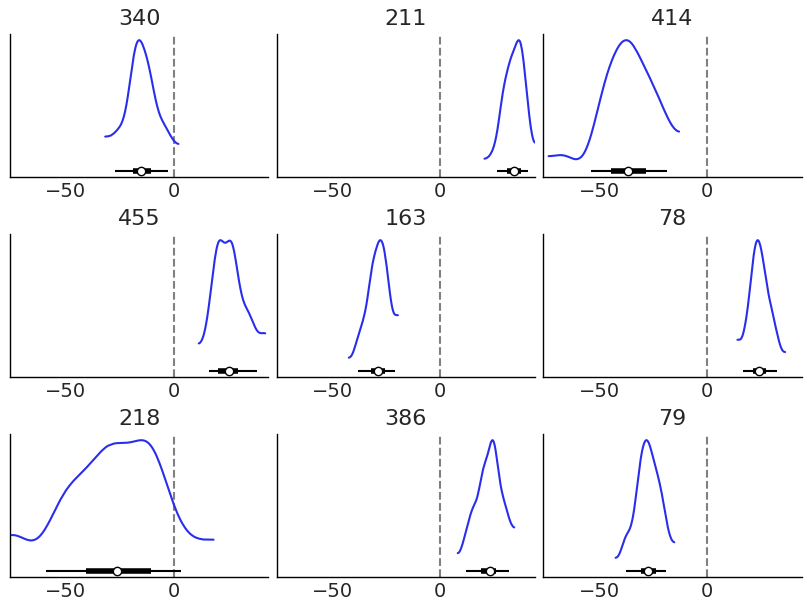

In [6]:
%matplotlib widget
pz.ppa(a_preliz_model)

 The `ppa` function will take the function `a_preliz_model` and generate 500 samples from the prior (`a`, `b`) and prior_predictive distribution `y`. Then it will automatically select 9 samples from the prior_predictive distribution.
 
 The user then can select those samples that best match their domain knowledge (i.e. prior information and NOT the observed data they want to fit). Once the user has selected at least one distribution they has two options, click on the `carry on` button to get a new subset of predictive distributions or click on the `return prior` button to get a prior that agrees with all the selected predictive distributions. 

 By default the first set of samples are selected at random, but trying to return a diverse subset. After the user has selected at least one sample the subsequent shown samples will be chosen to be similar to the previously selected one. `ppa` can eventually go back to return random samples, if in subsequent runs the user don't select new samples and keep pressing the `carry on` button.
 
 Alternatively to the random initialization. We can information `ppa` about our prior knowledge by passing the `init` argument. If that's the case, then `ppa` will first shown 9 samples to be as close as possible to what specified by `init`. Currently, we have two options, pass a PreliZ distribution or a 2-tuple with the first element representing the mean and the second the standard deviation. 

Note: `ppa` is restricted to return prior on the same family as specified in PreliZ model, in this example the prior for `a` will always be `Normal` and the prior for `b` `HalfNormal`. We are currently exploring the possibility to return families different from those specified in the original model.


If you are unable to run these notebook, you can get a glimpse of `ppa` from this gif


![ppa](ppa.gif)